<a href="https://colab.research.google.com/github/Yunjimin/GUI-project/blob/master/Chapter3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#로이터 데이터셋 로드
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
#디코딩 코드
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_newswire

557056/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [3]:
# 데이터 인코딩하기

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [4]:
#원 핫 인코딩
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
# 모델 정의

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [6]:
# 모델 컴파일하기

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# 검증 세트 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
# 모델 훈련하기

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 38ms/step - loss: 3.0326 - accuracy: 0.4353 - val_loss: 1.6149 - val_accuracy: 0.6550
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4495 - accuracy: 0.6966 - val_loss: 1.3044 - val_accuracy: 0.6980
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0791 - accuracy: 0.7640 - val_loss: 1.1177 - val_accuracy: 0.7660
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8448 - accuracy: 0.8224 - val_loss: 1.0400 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6692 - accuracy: 0.8632 - val_loss: 0.9697 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5412 - accuracy: 0.8876 - val_loss: 0.9334 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4142 - accuracy: 0.9136 - val_loss: 0.9417 - val_accuracy: 0.7990
Epoch 8/20
16

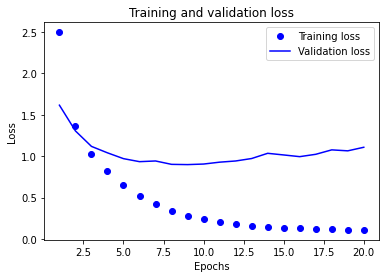

In [9]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

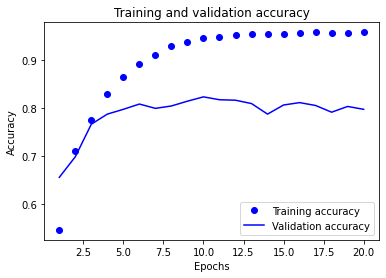

In [11]:
# 훈련과 검증 정확도 그리기
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# 모델 처음부터 다시 훈련

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 25ms/step - loss: 3.1769 - accuracy: 0.4093 - val_loss: 1.7932 - val_accuracy: 0.6210
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.5406 - accuracy: 0.6837 - val_loss: 1.3204 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.1174 - accuracy: 0.7603 - val_loss: 1.1256 - val_accuracy: 0.7570
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8567 - accuracy: 0.8195 - val_loss: 1.0499 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6920 - accuracy: 0.8563 - val_loss: 1.0057 - val_accuracy: 0.7820
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5453 - accuracy: 0.8875 - val_loss: 0.9389 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4294 - accuracy: 0.9124 - val_loss: 0.9492 - val_accuracy: 0.8010
Epoch 8/9
16/16 [===

In [13]:
# 결과
results

[0.9624140858650208, 0.792965292930603]

In [14]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19412288512911843

In [15]:

predictions = model.predict(x_test)

In [16]:
predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])

3

In [17]:
# 레이블을 인코딩 하는 다른 방법 : 정수 텐서로 변환하기
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [18]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 3.6176 - accuracy: 0.0422 - val_loss: 2.9426 - val_accuracy: 0.2300
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.6502 - accuracy: 0.3217 - val_loss: 1.9083 - val_accuracy: 0.6110
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.6814 - accuracy: 0.6519 - val_loss: 1.5825 - val_accuracy: 0.6520
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.4208 - accuracy: 0.6684 - val_loss: 1.5045 - val_accuracy: 0.6410
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2734 - accuracy: 0.6755 - val_loss: 1.4636 - val_accuracy: 0.6510
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1844 - accuracy: 0.6947 - val_loss: 1.4554 - val_accuracy: 0.6470
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1348 - accuracy: 0.6892 - val_loss: 1.4525 - val_accuracy: 0.6520
Epoch 8/20
63/63 [==

In [20]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 2.2613 - accuracy: 0.6541


In [21]:
results

[2.2613461017608643, 0.654051661491394]